In [2]:
#%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import xarray as xr
from netCDF4 import Dataset as nc, num2date, MFDataset as mc, date2num
import os
import pytz
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
sns.set_style("whitegrid")
from DataFrame import *
from datetime import datetime
from astropy.stats import LombScargle
import astropy.units as u
from scipy import signal
import matplotlib, sys
from mpl_toolkits.basemap import Basemap, cm as colmap
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [30.0,30.0]
from collections import namedtuple
timezone = pytz.timezone('Australia/Darwin')
utc = pytz.UTC
from matplotlib import animation, rc
from matplotlib.colors import LightSource
from matplotlib.colorbar import cm as colmap2
cmap = plt.cm.gist_earth
from matplotlib.patches import Polygon


In [3]:
CPOL = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_TIWI_1998-2017.nc')
WOHF = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_WOH.nc')
CMORPHF = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'UM', 'CMORPH_V1_WOH.nc')
WOHFv1 = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_WOHv1.nc')
WOHFv2 = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_WOHv2.nc')
BurstF = os.path.join(os.environ['HOME'], 'Data', 'Extremes', 'CPOL', 'CPOL_burst-cmorph.pkl')
PercF = os.path.join(os.environ['HOME'],'Data','Extremes','CPOL','CPOL_TIWI_Percentiles.hdf5')
extremeTS = os.path.join(os.environ['HOME'],'Data','Extremes','CPOL','CPOL_TIWI_TS_extrme.pkl')
percf =  os.path.join(os.environ['HOME'],'Data','Extremes','CPOL', 'Periods.npz')
outdir = os.path.join(os.getenv('HOME'),'Data','Extremes','UM', 'Plot', 'Week_of_Hector')

In [5]:
with nc(os.path.join(os.getenv('HOME'), 'Downloads','topo_2.nc')) as topof:
    topo=np.ma.masked_equal(topof.variables['topo'][:],0)
    lon=topof.variables['longitude'][:]
    lat=topof.variables['latitude'][:]
ls = LightSource(azdeg=315, altdeg=45)
Topo = ls.hillshade(topo[:], vert_exag=1)

In [6]:
#Create the map for plotting
m = Basemap(llcrnrlat=-18., llcrnrlon=122, urcrnrlat=-6.5, urcrnrlon=140, resolution='f',
            area_thresh=1)

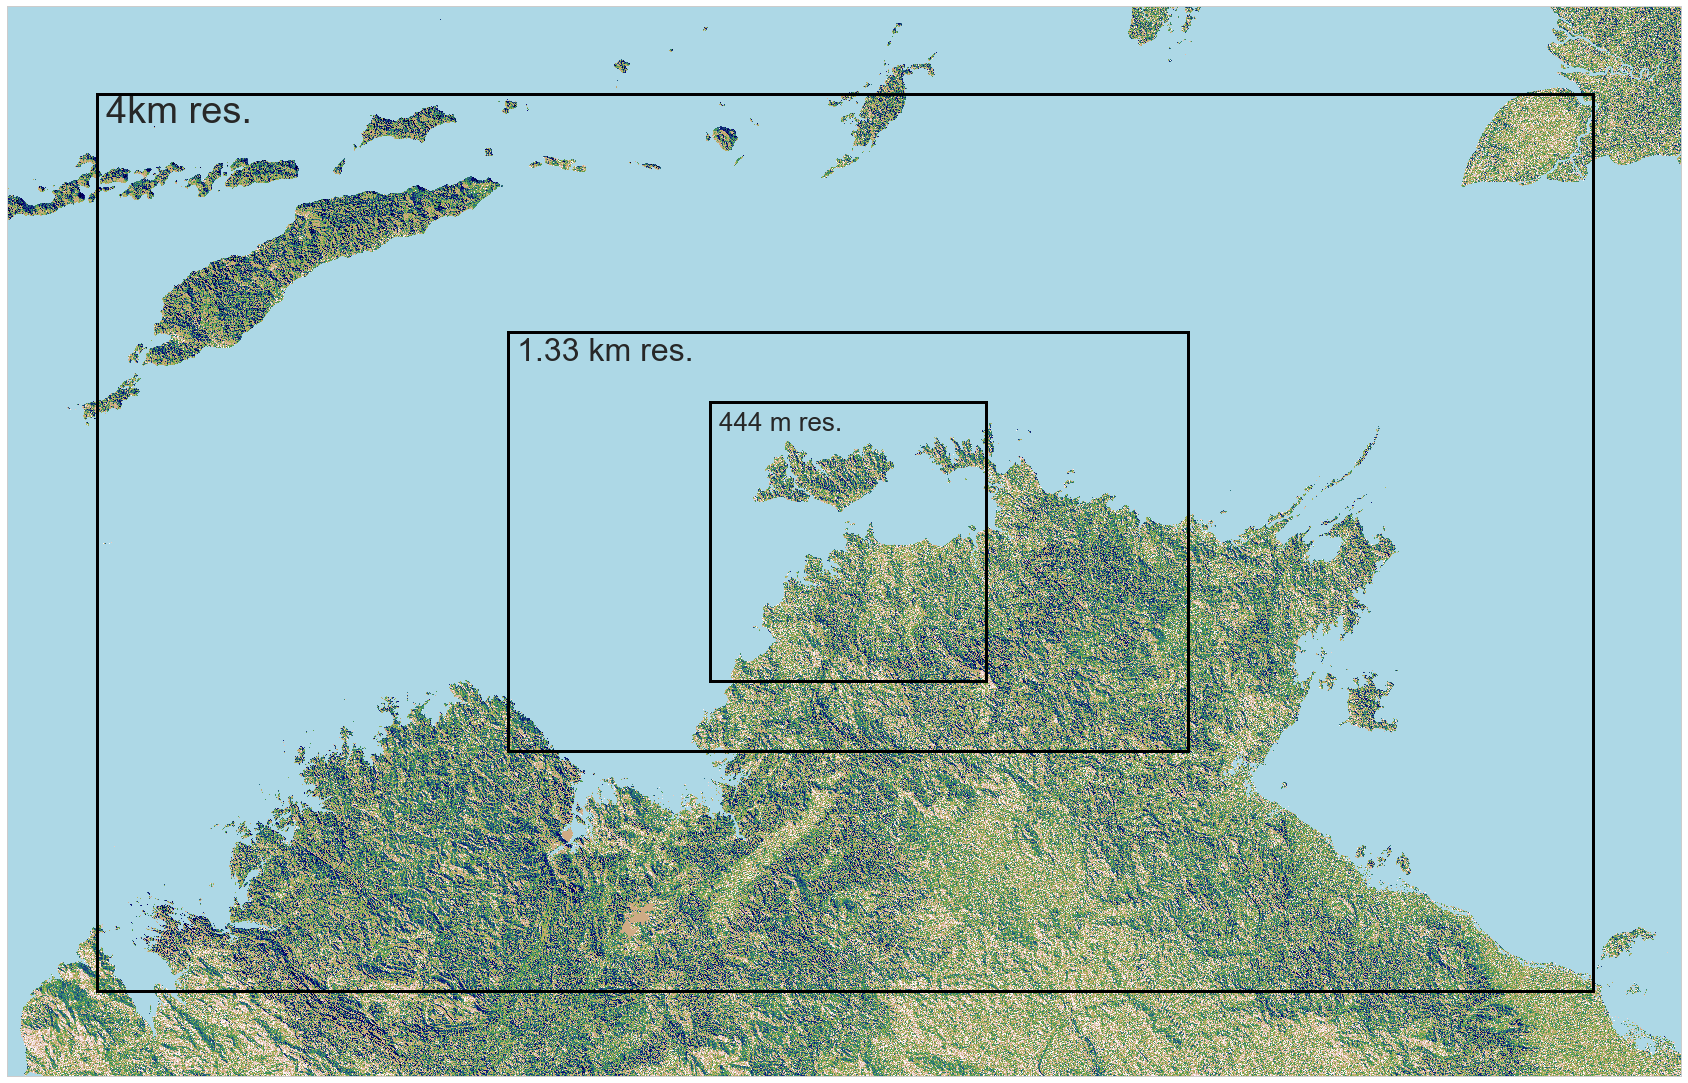

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
cmap.set_bad('lightblue')
files=('topo_4km.nc', 'topo_1p33km.nc', 'topo_0p4km.nc')
borders = (([122.963, 139.055], [-17.091, -7.443]), 
           ([127.385, 134.693], [-14.505, -10.005]), 
           ([129.557, 132.529], [-13.757, -10.757]))
text=(('4km res.', 38), ('1.33 km res.', 32), ('444 m res.', 26))
topodir = os.path.join(os.getenv('HOME'), 'Downloads')
m.pcolormesh(lon, lat, ls.hillshade(topo[:], vert_exag=1), cmap= cmap, ax=ax)
for conf in range(3):
    with nc(os.path.join(topodir, files[conf])) as fnc:
        lon1, lat1 = fnc.variables['longitude'][:], fnc.variables['latitude'][:]
        topo1 = np.ma.masked_equal(fnc.variables['topo'][:],0)
        lons,lats = borders[conf]
        txt, fts = text[conf]
        x, y = m([lons[0], lons[0], lons[1],lons[1]], [lats[0], lats[1], lats[1], lats[0]])
        xy = list(zip(x,y))
        poly = Polygon(xy, alpha=1, edgecolor='k', lw=3, facecolor='none')
        plt.gca().add_patch(poly)
        plt.text(lons[0]+0.1, lats[-1]-0.3, txt, fontsize=fts)
        #m.pcolormesh(lon1, lat1, ls.hillshade(topo1[:], vert_exag=1), cmap= cmap, ax=ax)
#m.drawcoastlines()

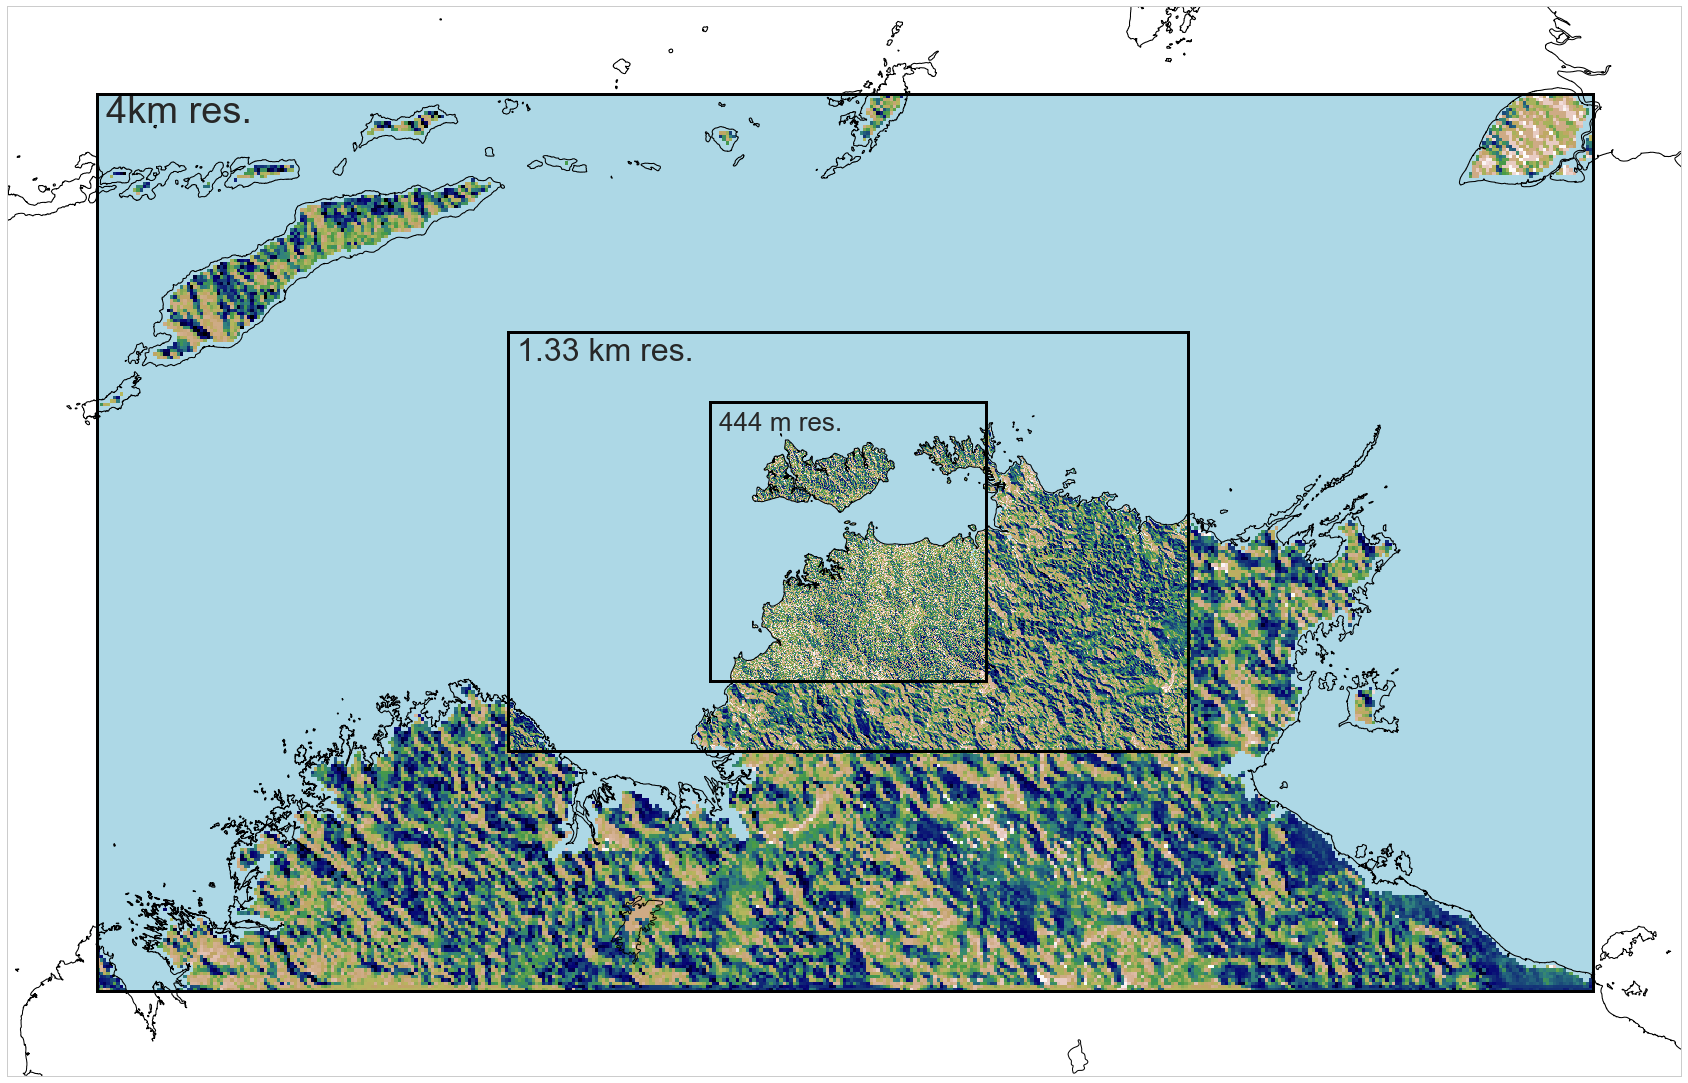

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
cmap.set_bad('lightblue')
files=('topo_4km.nc', 'topo_1p33km.nc', 'topo_0p4km.nc')
borders = (([122.963, 139.055], [-17.091, -7.443]), 
           ([127.385, 134.693], [-14.505, -10.005]), 
           ([129.557, 132.529], [-13.757, -10.757]))
text=(('4km res.', 38), ('1.33 km res.', 32), ('444 m res.', 26))
topodir = os.path.join(os.getenv('HOME'), 'Downloads')
#m.pcolormesh(lon, lat, ls.hillshade(topo[:], vert_exag=1), cmap= cmap, ax=ax)
for conf in range(3):
    with nc(os.path.join(topodir, files[conf])) as fnc:
        lon1, lat1 = fnc.variables['longitude'][:], fnc.variables['latitude'][:]
        topo1 = np.ma.masked_equal(fnc.variables['topo'][:],0)
        lons,lats = borders[conf]
        txt, fts = text[conf]
        x, y = m([lons[0], lons[0], lons[1],lons[1]], [lats[0], lats[1], lats[1], lats[0]])
        xy = list(zip(x,y))
        poly = Polygon(xy, alpha=1, edgecolor='k', lw=3, facecolor='none')
        plt.gca().add_patch(poly)
        plt.text(lons[0]+0.1, lats[-1]-0.3, txt, fontsize=fts)
        m.pcolormesh(lon1, lat1, ls.hillshade(topo1[:], vert_exag=1), cmap= cmap, ax=ax)
m.drawcoastlines()